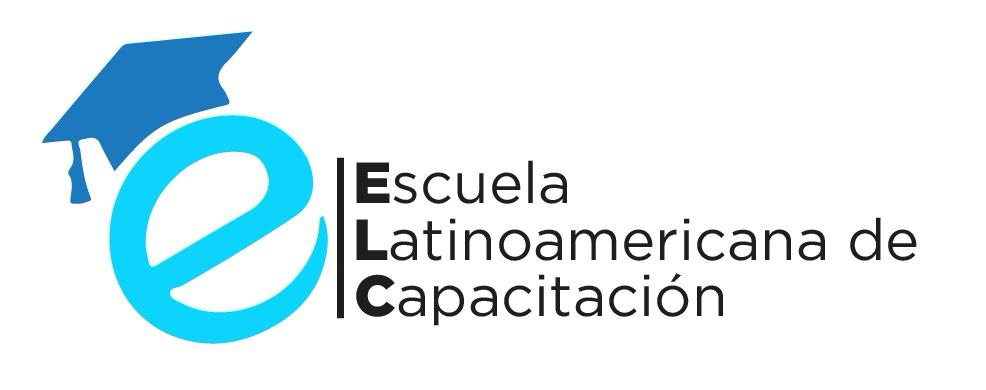

# Diplomado: "Ciencia de Datos & IA."
## Fundamentos de Machine Learning
### Profesor: Diego Miranda Olavarria
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_excel("banco.xlsx")

data.head()

,ID-Cliente,Renta,Edad,Patrimonio (CLP),Segmento,Sexo,Estado Civil,N° Productos Bancarios,Historial Crediticio,Empleo,Educación
0,1,2619110,68,94817241,2,0,0,3,Malo,2,2
1,2,3168307,43,431220993,2,1,3,3,Regular,0,2
2,3,2629084,44,462836020,2,1,1,3,Malo,1,4
3,4,3911566,59,410375048,2,0,1,2,Bueno,0,2
4,5,2756330,26,327714312,2,1,0,2,Bueno,1,2


In [2]:
data.shape

(1000, 11)

In [3]:
data.describe()

,ID-Cliente,Renta,Edad,Patrimonio (CLP),Segmento,Sexo,Estado Civil,N° Productos Bancarios,Empleo,Educación
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,251.811000,2.231333e+06,46.985000,2.490078e+08,1.719000,0.525000,0.704000,2.036000,0.742000,2.703000
std,142.715013,1.036498e+06,13.309918,1.479973e+08,0.449712,0.499624,0.786767,0.803336,0.726611,1.166255
min,1.000000,4.219590e+05,25.000000,5.797968e+06,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,130.750000,1.353277e+06,35.000000,1.120963e+08,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,252.000000,2.319486e+06,47.000000,2.516610e+08,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000
75%,375.000000,3.114227e+06,59.000000,3.834068e+08,2.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,500.000000,3.988633e+06,69.000000,4.995585e+08,2.000000,1.000000,3.000000,3.000000,2.000000,4.000000


In [4]:
data = data.drop('ID-Cliente', axis=1) 
data.head()

,Renta,Edad,Patrimonio (CLP),Segmento,Sexo,Estado Civil,N° Productos Bancarios,Historial Crediticio,Empleo,Educación
0,2619110,68,94817241,2,0,0,3,Malo,2,2
1,3168307,43,431220993,2,1,3,3,Regular,0,2
2,2629084,44,462836020,2,1,1,3,Malo,1,4
3,3911566,59,410375048,2,0,1,2,Bueno,0,2
4,2756330,26,327714312,2,1,0,2,Bueno,1,2


In [5]:
# Para clasificar primero debemos separar en 2 variables independiente y dependiente
# X = variables independientes 
# y = variable dependiente, que es la que quiero predecir o clasificar


# creacion de variables independientes
X = data.drop('Historial Crediticio', axis=1) 
# creacion de la variable dependiente
y = data['Historial Crediticio']


In [6]:
# seperar los datos en conjunto de entrenamiento y prueba 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Arbol de Decision

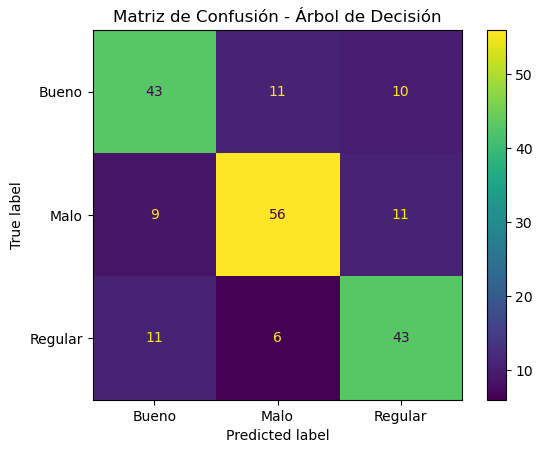

In [8]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_arbol)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


# Random Forest

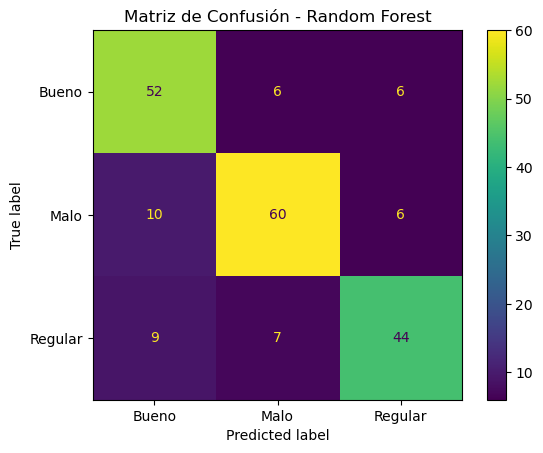

In [9]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Matriz de Confusión - Random Forest")
plt.show()



# XGBoost

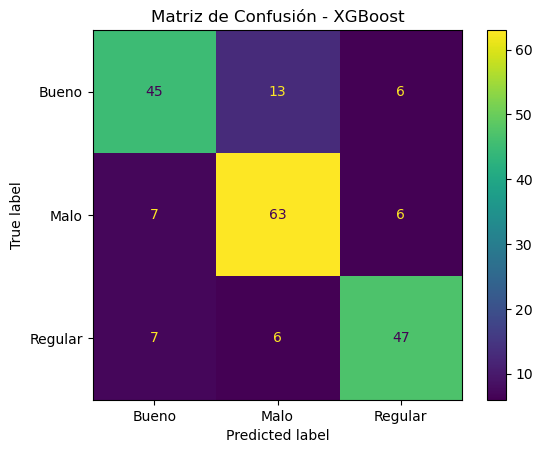

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


modelo_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
modelo_xgb.fit(X_train, y_train_encoded)
y_pred_xgb = modelo_xgb.predict(X_test)

# Matriz de confusión con etiquetas originales
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_xgb, display_labels=le.classes_)
plt.title("Matriz de Confusión - XGBoost")
plt.show()


# Escalado de datos

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [12]:
# Codificamos y
le = LabelEncoder()
y_encoded = le.fit_transform(data['Historial Crediticio'])

# Separar features y target
X = data.drop('Historial Crediticio', axis=1)

# Asegúrate de que todas las variables categóricas ya estén codificadas
# Si hay variables como Sexo, Estado Civil, etc., debes codificarlas antes (map, LabelEncoder o OneHotEncoder)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Regresion Logistica

Regresión Logística:
               precision    recall  f1-score   support

       Bueno       0.34      0.48      0.40        64
        Malo       0.41      0.49      0.44        76
     Regular       0.41      0.12      0.18        60

    accuracy                           0.38       200
   macro avg       0.39      0.36      0.34       200
weighted avg       0.39      0.38      0.35       200



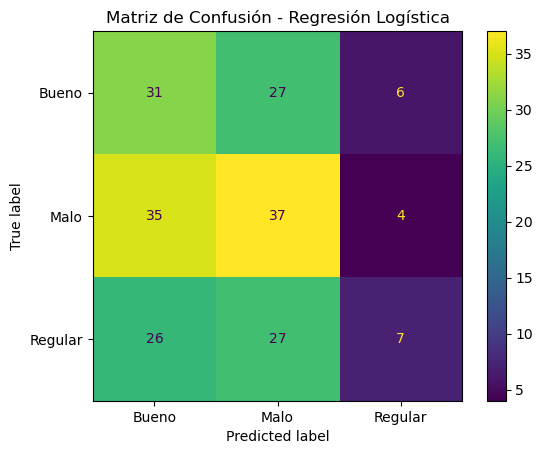

In [13]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train)
y_pred_lr = modelo_lr.predict(X_test_scaled)

# Reporte
print("Regresión Logística:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=le.classes_)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


# KNN

KNN:
               precision    recall  f1-score   support

       Bueno       0.42      0.61      0.50        64
        Malo       0.52      0.47      0.50        76
     Regular       0.46      0.30      0.36        60

    accuracy                           0.47       200
   macro avg       0.47      0.46      0.45       200
weighted avg       0.47      0.47      0.46       200



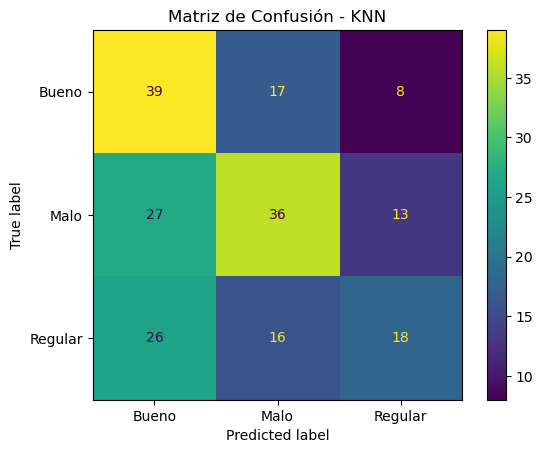

In [14]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)
y_pred_knn = modelo_knn.predict(X_test_scaled)

print("KNN:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=le.classes_)
plt.title("Matriz de Confusión - KNN")
plt.show()


# Maquina de Soporte Vectorial

SVM:
               precision    recall  f1-score   support

       Bueno       0.43      0.72      0.54        64
        Malo       0.48      0.38      0.42        76
     Regular       0.50      0.27      0.35        60

    accuracy                           0.46       200
   macro avg       0.47      0.46      0.44       200
weighted avg       0.47      0.46      0.44       200



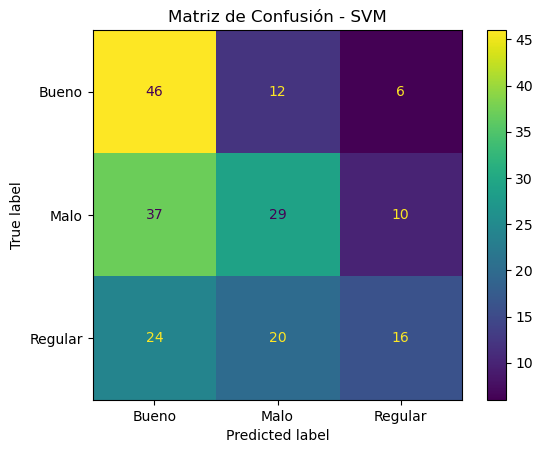

In [15]:
from sklearn.svm import SVC

modelo_svm = SVC(kernel='rbf')
modelo_svm.fit(X_train_scaled, y_train)
y_pred_svm = modelo_svm.predict(X_test_scaled)

print("SVM:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=le.classes_)
plt.title("Matriz de Confusión - SVM")
plt.show()


# Perceptron Multicapa

Red Neuronal (MLP):
               precision    recall  f1-score   support

       Bueno       0.49      0.56      0.52        64
        Malo       0.44      0.37      0.40        76
     Regular       0.52      0.53      0.52        60

    accuracy                           0.48       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.48      0.48      0.48       200



C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


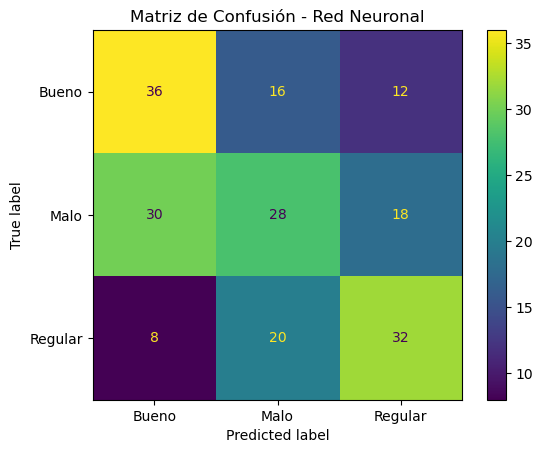

In [16]:
from sklearn.neural_network import MLPClassifier

modelo_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
modelo_mlp.fit(X_train_scaled, y_train)
y_pred_mlp = modelo_mlp.predict(X_test_scaled)

print("Red Neuronal (MLP):\n", classification_report(y_test, y_pred_mlp, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, display_labels=le.classes_)
plt.title("Matriz de Confusión - Red Neuronal")
plt.show()
